# 데이터 처리 환경 설정

In [3]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import collections
import datetime as dt
import time
from sklearn.linear_model import LinearRegression
from scipy.spatial import ConvexHull, convex_hull_plot_2d



from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

pd.set_option('display.max_rows', 220)
pd.set_option('display.max_columns', 20)

## 변수 설명
* gu_list: 구 이름 리스트
* gu_count : 구별 동 갯수 리스트
* dong_list : 읍면동 이름 리스트

## Function
* def predict_people(city, want):
    * city:읍면동, want:총 유동인구
    * ex) predict_people('장전1동', '총 유동인구')
    * 읍면동의 총 유동인구를 예측하여 시각화 해주는 함수
* def predict_money_power(gu):
    * gu:구군
    * ex) predict_money_power('금정구')
    * 구군의 구매력을 예측하여 시각화 해주는 함수
* def z_score_normalize(lst):
    * lst:Z-정규화를 시키고 싶은 리스트
    * 리스트를 Z-정규화 시켜줌
* def analysis_store(dong):
    * dong: 읍면동
    * 방사형 그래프를 시각화 시켜줌

In [4]:
def predict_people(city, want):
    data['년월값']=0
    data['년월값']=pd.to_datetime(data['년월'])
    data['년월값']=data['년월값'].map(dt.datetime.toordinal)
    
    X=pd.DataFrame(data[data['읍면동']==city]['년월값'])
    y=pd.DataFrame(data[data['읍면동']==city][want])

    X['년월']=X['년월값'].map(dt.date.fromordinal)
    X['년월']=pd.to_datetime(X['년월'])

    data_list=X['년월'].to_list()
    data_list
    df=pd.DataFrame({'year_month': data_list})

    X=X.reset_index()
    X['년월']= df['year_month'].dt.strftime('%Y-%m')
    
    line_fitter=LinearRegression()
    line_fitter.fit(X['년월값'].values.reshape(-1,1),y)

    predict=line_fitter.predict([[X['년월값'][11]+30]])
    print(str(int(np.round([[predict]][-1][-1])))+'명')
    
    plt.plot(X['년월'], y, 'o')
    plt.plot(X['년월'],line_fitter.predict(X['년월값'].values.reshape(-1,1)))
    plt.xticks(rotation=20)
    plt.show()
# line_fitter.coef_, line_fitter.intercept_

In [5]:
def predict_money_power(gu):
    data_money['년월값']=0
    data_money['년월값']=pd.to_datetime(data_money['년도월'])
    data_money['년월값']=data_money['년월값'].map(dt.datetime.toordinal)

    X=pd.DataFrame(data_money[data_money['구군']==gu]['년월값'])
    y=pd.DataFrame(data_money[data_money['구군']==gu]['카드이용금액(천원)'])

    X['년월']=X['년월값'].map(dt.date.fromordinal)
    X['년월']=pd.to_datetime(X['년월'])

    data_list=X['년월'].to_list()
    data_list
    df=pd.DataFrame({'year_month': data_list})    

    X=X.reset_index()
    X['년월']= df['year_month'].dt.strftime('%Y-%m')

    line_fitter=LinearRegression()
    line_fitter.fit(X['년월값'].values.reshape(-1,1),y)

    a=line_fitter.predict([[X['년월값'][2]+91]])

    print(str(int(np.round([[a]][-1][-1])))+'원')

    plt.plot(X['년월'], y, 'o')
    plt.plot(X['년월'],line_fitter.predict(X['년월값'].values.reshape(-1,1)))
    plt.xticks(rotation=20)
    plt.show()

In [6]:
def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized

In [42]:
def analysis_store(dong):
    Depts = ["경쟁업체(십)","영업이익/매출액(%)","구매력(백만)","유동인구(만)", "총인구(천)"]
    # 진입 상권

    for i in range(len(gu_list)):
        print(gu_list[i])
        print(dong_list_per_gu[i])

    want_store=dong
    want_data=data_per_dong[data_per_dong['읍면동']==want_store]
    want_s=[want_data['경쟁업체 수'].tolist()[0]/10, want_data['영업이익/매출액(%)'].tolist()[0], want_data['예측 구매력'].tolist()[0]/5000000, 
            want_data['예측 유동인구'].tolist()[0]/10000, want_data['총 인구'].tolist()[0]/1000, want_data['경쟁업체 수'].tolist()[0]/10]

    # 평균 상권
    ave_data=data_per_dong[data_per_dong['구군']==want_data['구군'].tolist()[0]]
    ave_s=[ave_data['경쟁업체 수'].sum()/len(ave_data['경쟁업체 수'])/10, ave_data['영업이익/매출액(%)'].sum()/len(ave_data['영업이익/매출액(%)']), 
           want_data['구의 동별 평균 구매력'].tolist()[0]/5000000, ave_data['예측 유동인구'].sum()/len(ave_data['예측 유동인구'])/10000, 
           want_data['구의 동별 평균 인구'].tolist()[0]/1000,ave_data['경쟁업체 수'].sum()/len(ave_data['경쟁업체 수'])/10]

    nor_want_s=[want_data['경쟁업체 수_정규화'].tolist()[0], want_data['영업이익/매출액(%)_정규화'].tolist()[0],
                want_data['예측 구매력_정규화'].tolist()[0], want_data['예측 유동인구_정규화'].tolist()[0],
                want_data['총 인구_정규화'].tolist()[0], want_data['경쟁업체 수_정규화'].tolist()[0]]

    nor_ave_s=[ave_data['경쟁업체 수_정규화'].sum()/len(ave_data['경쟁업체 수_정규화']),
               ave_data['영업이익/매출액(%)_정규화'].sum()/len(ave_data['영업이익/매출액(%)_정규화']), 
           want_data['구의 동별 평균 구매력_정규화'].tolist()[0], ave_data['예측 유동인구_정규화'].sum()/len(ave_data['예측 유동인구_정규화']), 
           want_data['구의 동별 평균 인구_정규화'].tolist()[0],ave_data['경쟁업체 수_정규화'].sum()/len(ave_data['경쟁업체 수_정규화'])]

    grade_store_list=[]
    for i in range(len(nor_want_s)):
        if i==0:
            grade_store_list.append(-(nor_want_s[i]-nor_ave_s[i])*1.8)
        elif i==2:
            grade_store_list.append((nor_want_s[i]-nor_ave_s[i])*1.4)
        elif i==4:
            grade_store_list.append((nor_want_s[i]-nor_ave_s[i])*1.8)
        else:
            grade_store_list.append((nor_want_s[i]-nor_ave_s[i]))

    grade_store=sum(grade_store_list)

    grade=''
    if grade_store>=sorted(grade_list)[-50]:
        grade='좋음'
    elif np.mean(grade_list)<=grade_store<sorted(grade_list)[-50]:
        grade='양호'
    elif sorted(grade_list)[50]<=grade_store<np.mean(grade_list):
        grade='고려'
    elif grade_store<sorted(grade_list)[50]:
        grade='나쁨'


    plt.figure(figsize=(10,6))
    plt.subplot(polar=True)

    theta = np.linspace(0, 2 * np.pi, len(want_s))

    (lines,labels) = plt.thetagrids(range(0,360, int(360/len(Depts))), (Depts))

    plt.plot(theta, want_s)
    plt.fill(theta, want_s, 'b', alpha=0.1)
    plt.plot(theta, ave_s)
    plt.legend(labels=(want_store,want_data['구군'].tolist()[0]+' 평균 상권'),loc=1)
    plt.title(want_store+" 상권분석 서비스 결과->"+grade)

    plt.show();

    plt.show();

## 데이터 불러오기

In [8]:
ori_data19=pd.read_csv("./data/2019동별 유동인구.csv", encoding='utf-8')
ori_data20=pd.read_csv("./data/2020동별 유동인구.csv", encoding='cp949')
ori_data_total=pd.read_csv('./data/2019년도 부산시 총인구(동별).csv', encoding='cp949')
ori_data_money=pd.read_csv("./data/부산_구군별 총 카드이용금액.csv", encoding='utf-8')
ori_data_rival=pd.read_csv("./data/부산_읍면동별_경쟁업체수.csv", encoding='cp949')
ori_data_benifit=pd.read_csv('./data/부산_읍면동별_매출대비이익.csv',encoding='cp949')
ori_data_do=pd.read_csv("./data/save/상가정보_부산_코드구분.csv", encoding='cp949')

In [9]:
data19=ori_data19.copy()
data20=ori_data20.copy()

data_total=ori_data_total.drop(0).reset_index().copy()
data_total=data_total.drop(columns='index')

data_rival=ori_data_rival[ori_data_rival['행정동명']!='장전3동'].reset_index().copy()
data_rival=data_rival.drop(columns='index')

data_benifit=ori_data_benifit[ori_data_benifit['행정동명']!='장전3동'].reset_index().copy()
data_benifit=data_benifit.drop(columns='index')

data_money=ori_data_money.copy()

data_do=ori_data_do.copy()

## 읍면동 list로 뽑기

In [10]:
data_dong_list=[]
for i in data20['읍면동'].unique():
        data_dong_list.append(i)

## 2019년 데이터 전처리
* 장전3동이 2동에 흡수

In [11]:
for i in range(8,13):
    globals()['df{}'.format(i)]=data19[data19['월']==i]
    
data19=pd.concat([df8,df9,df10,df11,df12], axis=0)
data19=data19.reset_index()

data19['평균 유동인구']=[pd.to_numeric(data19['평균 유동인구'][i].replace(',','').replace('명','')) for i in range(len(data19['평균 유동인구']))]

data_move=[]
for i in range(8,13):
    for j in data_dong_list:
        data_move.append(data19[(data19['읍면동']==j)&(data19['월']==i)]['평균 유동인구'].sum())
        
data19=data19[data19['요일']=='일']
data19=data19.reset_index()
data19['총 유동인구']=0
for i in range(len(data_move)):
    data19['총 유동인구'][i]=data_move[i]
    
data19=data19[(data19['요일']=='일')]
data19=data19[['구군','년','월','읍면동','총 유동인구']]

for i in data19[data19['읍면동']=='장전2동'].index:
    data19['총 유동인구'][i]=data19['총 유동인구'][i]+data19['총 유동인구'][i+1]
    
data19=data19[data19['읍면동']!='장전3동'].reset_index().copy()
data19=data19.drop(columns='index')

## 2020년 data 전처리
* 장전3동이 2동에 흡수

In [12]:
data20['주중/주말 유동인구']=[pd.to_numeric(data20['주중/주말 유동인구'][i].replace(',','')) for i in range(len(data20['주중/주말 유동인구']))]
data_move=[]
for i in range(1,8):
    for j in data_dong_list:
        data_move.append(data20[(data20['읍면동']==j)&(data20['월']==i)]['주중/주말 유동인구'].sum())
        
data20['총 유동인구']=0
for i in range(len(data_move)):
    data20['총 유동인구'][i]=data_move[i]
    
data20=data20[data20['요일']=='일']
data20=data20[['구군','년','월','읍면동','총 유동인구']]

for i in data20[data20['읍면동']=='장전2동'].index:
    data20['총 유동인구'][i]=data20['총 유동인구'][i]+data20['총 유동인구'][i+1]
    
data20=data20[data20['읍면동']!='장전3동'].reset_index().copy()
data20=data20.drop(columns='index')

## 19-20 데이터 합치기

In [13]:
data=pd.concat([data19, data20], axis=0)
data=data.reset_index()
for i in range(len(data['읍면동'])):
    if ('제' in data['읍면동'][i]):
        if ('거제' not in data['읍면동'][i]):
            data['읍면동'][i]=data['읍면동'][i].replace('제','')

## 총 인구수 데이터 전처리

In [14]:
data_total=data_total.reset_index()
data_total=data_total[['행정구역(동읍면)별','2019']]
data_total.columns=['읍면동','총 인구수']
for i in range(len(data_total['읍면동'])):
    if ('제' in data_total['읍면동'][i]):
        if ('거제' not in data_total['읍면동'][i]):
            data_total['읍면동'][i]=data_total['읍면동'][i].replace('제','')
        elif ('거제제' in data_total['읍면동'][i]):
            data_total['읍면동'][i]=data_total['읍면동'][i].replace('거제제','거제')
        
a=[]
for i in range(len(data_total['읍면동'])):
    if '구' in data_total['읍면동'][i][-1]:
        a.append(i)
        
data_total=data_total.drop([1, 11, 25, 38, 50, 71, 85, 103, 117, 136, 153, 171, 180, 193, 204])
data_total=data_total.reset_index()
data_total=data_total[data_total['읍면동']!='장전3동'].reset_index().copy()

In [15]:
data['년월']=0
for i in range(len(data['년'])):
        data['년월'][i]=str(data['년'][i])+'.'+str(data['월'][i])
        data['년월'][i]=pd.to_datetime(data['년월'][i])
        

data_list=data['년월'].to_list()
data_list
df=pd.DataFrame({'year_month': data_list})

data['년월']= df['year_month'].dt.strftime('%Y-%m')    

# 2020년 08월 유동인구 예측
* LinearRegression을 이용하여 시계열 예측 

In [16]:
predict_list=data[data['읍면동']!='장전3동']['읍면동'].unique().tolist()
predict_people_all=[]
for i in predict_list:
    data['년월값']=0
    data['년월값']=pd.to_datetime(data['년월'])
    data['년월값']=data['년월값'].map(dt.datetime.toordinal)

    X=pd.DataFrame(data[data['읍면동']==i]['년월값'])
    y=pd.DataFrame(data[data['읍면동']==i]['총 유동인구'])
    
    X['년월']=X['년월값'].map(dt.date.fromordinal)
    X['년월']=pd.to_datetime(X['년월'])
    
    data_list=X['년월'].to_list()
    data_list
    df=pd.DataFrame({'year_month': data_list})    
    
    X=X.reset_index()
    X['년월']= df['year_month'].dt.strftime('%Y-%m')
    
    line_fitter=LinearRegression()
    line_fitter.fit(X['년월값'].values.reshape(-1,1),y)
    
    a=line_fitter.predict([[X['년월값'][11]+30]])
    predict_people_all.append(int(np.round([[a]][-1][-1])))

## 동별, 달별 데이터 구축
* 월별 유동인구 수 데이터
* 2020-08 유동인구 예측 데이터


In [21]:
data_per_month=data[['구군','읍면동','년월','총 유동인구']]

In [22]:
data_per_dong=data[data['월']==8].copy()
data_per_dong['총 인구']=0
for i in range(len(data_per_dong['읍면동'])):
    for j in range(len(data_total['읍면동'])):
        if (data_per_dong['읍면동'][i]==data_total['읍면동'][j]):
                data_per_dong['총 인구'][i]=data_total['총 인구수'][j]
                
# data['총 인구']=data['읍면동'].apply(lambda x: data_total.loc[data_total['읍면동']==x].iloc[0,2])
                
data_per_dong=data_per_dong[['구군','읍면동','년월','총 유동인구','총 인구']]

In [23]:
data_per_dong=data_per_dong[['구군','읍면동','총 인구']]
data_per_dong['예측 유동인구']=0
for i in range(len(predict_people_all)):
    data_per_dong['예측 유동인구'][i]=predict_people_all[i]

# 2020년 8월 구매력 예측

## 부산시_구별_구매력 데이터 전처리

In [24]:
data_money['년도월']=0
for i in range(len(data_money['년도'])):
        data_money['년도월'][i]=str(data_money['년도'][i])+'.'+str(data_money['월'][i])
        data_money['년도월'][i]=pd.to_datetime(data_money['년도월'][i])
        

data_money_list=data_money['년도월'].to_list()
data_money_list
df=pd.DataFrame({'year_month': data_money_list})

data_money['년도월']= df['year_month'].dt.strftime('%Y-%m') 

for i in range(len(data_money['3개월 총 카드이용금액(천원)'])):
    data_money['3개월 총 카드이용금액(천원)'][i]=int(data_money['3개월 총 카드이용금액(천원)'][i].replace(',',''))
    
data_money=data_money[['구군','년도월','3개월 총 카드이용금액(천원)']]
data_money.columns=['구군','년도월','카드이용금액(천원)']

## Linear Regression을 이용한 부산시_구별_구매력 예측

In [25]:
data_money_list=data_money['구군'].tolist()

money_power=[]
for i in data_money_list:
    data_money['년월값']=0
    data_money['년월값']=pd.to_datetime(data_money['년도월'])
    data_money['년월값']=data_money['년월값'].map(dt.datetime.toordinal)

    X=pd.DataFrame(data_money[data_money['구군']==i]['년월값'])
    y=pd.DataFrame(data_money[data_money['구군']==i]['카드이용금액(천원)'])

    X['년월']=X['년월값'].map(dt.date.fromordinal)
    X['년월']=pd.to_datetime(X['년월'])

    data_list=X['년월'].to_list()
    data_list
    df=pd.DataFrame({'year_month': data_list})    

    X=X.reset_index()
    X['년월']= df['year_month'].dt.strftime('%Y-%m')

    line_fitter=LinearRegression()
    line_fitter.fit(X['년월값'].values.reshape(-1,1),y)

    a=line_fitter.predict([[X['년월값'][2]+91]])
    money_power.append(int(np.round([[a]][-1][-1])))
    
data_money['예측 구매력']=0
for i in range(len(money_power)):
    data_money['예측 구매력'][i]=money_power[i]
    
data_predict_money=data_money.drop_duplicates('예측 구매력')
data_predict_money=data_predict_money[['구군','예측 구매력']]

data_per_dong_sum=data_per_dong.groupby('구군').sum()
data_per_dong_sum=data_per_dong_sum.reset_index()

data_predict_money['총 인구']=0
data_predict_money['예측 유동인구']=0

for i in range(len(data_predict_money['구군'])):
    for j in range(len(data_per_dong_sum['구군'])):
        if (data_predict_money['구군'][i]==data_per_dong_sum['구군'][j]):
            data_predict_money['총 인구'][i]=data_per_dong_sum['총 인구'][j]
            data_predict_money['예측 유동인구'][i]=data_per_dong_sum['예측 유동인구'][j]

# RandomForest Regressor 사용
* 미래 시간에 대한 예측이 이루어지지 않아서 사용 불가

In [26]:
# from sklearn.ensemble import RandomForestRegressor

# predict_list=data[data['읍면동']!='장전3동']['읍면동'].unique().tolist()
# predict_people_all2=[]
# for i in predict_list:
#     data['년월값']=0
#     data['년월값']=pd.to_datetime(data['년월'])
#     data['년월값']=data['년월값'].map(dt.datetime.toordinal)

#     X=pd.DataFrame(data[data['읍면동']==i]['년월값'])
#     y=pd.DataFrame(data[data['읍면동']==i]['총 유동인구'])
    
#     X['년월']=X['년월값'].map(dt.date.fromordinal)
#     X['년월']=pd.to_datetime(X['년월'])
    
#     data_list=X['년월'].to_list()
#     data_list
#     df=pd.DataFrame({'year_month': data_list})    
    
#     X=X.reset_index()
#     X['년월']= df['year_month'].dt.strftime('%Y-%m')
    
#     line_fitter=RandomForestRegressor(max_depth=2, random_state=0, max_samples=9, n_jobs=-1)
#     line_fitter.fit(X['년월값'].values.reshape(-1,1),y)
    
#     a=line_fitter.predict([[X['년월값'][11]+30]])
#     predict_people_all2.append(int(np.round([[a]][-1][-1])))

## 구별 데이터를 동별 데이터로 변환작업

In [27]:
data_predict_money['인구 별 구매력']=0
data_predict_money['인구 별 구매력']=data_predict_money['예측 구매력']/data_predict_money['총 인구']

data_money_power=pd.merge(data_predict_money, data_per_dong,on='구군',how='right')
data_money_power=data_money_power[['구군','읍면동','총 인구_y','인구 별 구매력','총 인구_x','예측 구매력']]

data_money_power['구의 동별 평균 인구']=0
data_money_power['구의 동별 평균 구매력']=0

gu_count=[]
people_per_dong_in_gu=[]
money_per_dong_in_gu=[]
gu_list=data_money_power['구군'].unique().tolist()
dong_list=data_money_power['읍면동'].unique().tolist()

In [28]:
data_predict_money['인구 별 구매력']=0
data_predict_money['인구 별 구매력']=data_predict_money['예측 구매력']/data_predict_money['총 인구']

data_money_power=pd.merge(data_predict_money, data_per_dong,on='구군',how='right')
data_money_power=data_money_power[['구군','읍면동','총 인구_y','인구 별 구매력','총 인구_x','예측 구매력']]

data_money_power['구의 동별 평균 인구']=0
data_money_power['구의 동별 평균 구매력']=0

gu_count=[]
people_per_dong_in_gu=[]
money_per_dong_in_gu=[]
gu_list=data_money_power['구군'].unique().tolist()
dong_list=data_money_power['읍면동'].unique().tolist()
for i in gu_list:
    gu_count.append(collections.Counter(data_money_power['구군'])[i])

for i in range(len(gu_count)):
    people_per_dong_in_gu.append(data_money_power['총 인구_x'].unique().tolist()[i]/gu_count[i])
    money_per_dong_in_gu.append(round(data_money_power['예측 구매력'].unique().tolist()[i]/gu_count[i],-3))
    
array_people = []
array_money=[]
n=0
for i in people_per_dong_in_gu:
    if n<=len(gu_count):
        for j in range(gu_count[n]):
                array_people.append(i)
        n+=1
        
n=0
for i in money_per_dong_in_gu:
    if n<=len(gu_count):
        for j in range(gu_count[n]):
                array_money.append(i)
        n+=1  
            
for i in range(len(array_money)):
    data_money_power['구의 동별 평균 인구'][i]=array_people[i]
    data_money_power['구의 동별 평균 구매력'][i]=array_money[i]
    
data_money_power['동별 구매력']=0
data_money_power['동별 구매력']=data_money_power['총 인구_y']*data_money_power['인구 별 구매력']

data_money_power['동별 구매력']=round(data_money_power['동별 구매력'],-3)

In [29]:
data_benifit=data_benifit[['행정동명','매출액 대비 영업이익']]
data_benifit.columns=['읍면동','영업이익/매출액(%)']
data_money_power=pd.merge(data_money_power, data_benifit, on='읍면동', how='left')

## 동별 데이터에 병합

In [30]:
data_per_dong=pd.merge(data_per_dong,data_money_power,on='읍면동',how='left')
data_per_dong=data_per_dong[['구군_x','읍면동','총 인구','예측 유동인구','동별 구매력',
                             '구의 동별 평균 인구','구의 동별 평균 구매력','영업이익/매출액(%)']]
data_per_dong.columns=['구군','읍면동','총 인구','예측 유동인구','예측 구매력',
                      '구의 동별 평균 인구','구의 동별 평균 구매력','영업이익/매출액(%)']

# 동별 경쟁업체 수 병합

In [31]:
data_rival=data_rival[data_rival['행정동명']!='장전3동'].reset_index().copy()
data_rival=data_rival[['행정동명','편의점수','대형마트수','슈퍼마켓수','합계']]
data_rival.columns=['읍면동','편의점 수','대형마트 수','슈퍼마켓 수','경쟁업체 수']
data_per_dong=pd.merge(data_per_dong, data_rival, on='읍면동', how='left')

In [32]:
for i in range(len(data_per_dong['예측 구매력'])):
    data_per_dong['예측 구매력'][i]=int(data_per_dong['예측 구매력'][i])
    data_per_dong['편의점 수'][i]=int(data_per_dong['편의점 수'][i])
    data_per_dong['대형마트 수'][i]=int(data_per_dong['대형마트 수'][i])
    data_per_dong['슈퍼마켓 수'][i]=int(data_per_dong['슈퍼마켓 수'][i])
    data_per_dong['경쟁업체 수'][i]=int(data_per_dong['경쟁업체 수'][i])

## 정규화 과정

In [33]:
data_per_dong['총 인구_정규화']=''
data_per_dong['총 인구_정규화']=z_score_normalize(data_per_dong['총 인구'].tolist())
data_per_dong['예측 유동인구_정규화']=''
data_per_dong['예측 유동인구_정규화']=z_score_normalize(data_per_dong['예측 유동인구'].tolist())
data_per_dong['예측 구매력_정규화']=''
data_per_dong['예측 구매력_정규화']=z_score_normalize(data_per_dong['예측 구매력'].tolist())
data_per_dong['영업이익/매출액(%)_정규화']=''
data_per_dong['영업이익/매출액(%)_정규화']=z_score_normalize(data_per_dong['영업이익/매출액(%)'].tolist())
data_per_dong['경쟁업체 수_정규화']=''
data_per_dong['경쟁업체 수_정규화']=z_score_normalize(data_per_dong['경쟁업체 수'].tolist())
data_per_dong['구의 동별 평균 인구_정규화']=''
data_per_dong['구의 동별 평균 인구_정규화']=z_score_normalize(data_per_dong['구의 동별 평균 인구'].tolist())
data_per_dong['구의 동별 평균 구매력_정규화']=''
data_per_dong['구의 동별 평균 구매력_정규화']=z_score_normalize(data_per_dong['구의 동별 평균 구매력'].tolist())

In [34]:
dong_list_per_gu=[dong_list[:9], dong_list[9:22], dong_list[22:33], dong_list[33:44],
                 dong_list[44:64], dong_list[64:77], dong_list[77:94], dong_list[94:107],
                  dong_list[107:124], dong_list[124:140], dong_list[140:155], dong_list[155:161],
                 dong_list[161:173], dong_list[173:183], dong_list[183:195], dong_list[195:199]]

# 소상공인 등급과 비교
* 비교를 통해 우리의 가중치가 유의미한지 판단

In [35]:
compare_list=pd.read_csv('./data/score_list.csv')
compare_list.columns=['구군','읍면동','등급']

In [36]:
# most=[]
# for j1 in range(10, 21, 1):
#     for j2 in range(10, 21, 1):
#         for j3 in range(10, 21, 1):
#             for j4 in range(10, 21, 1):
#                 for j5 in range(10, 21, 1):
#                         # Depts = ["경쟁업체(십)","영업이익/매출액(%)","구매력(오백만)","유동인구(만)", "총인구(천)"]

#                     grade_list=[]
#                     for want_store in dong_list:
#                         want_data=data_per_dong[data_per_dong['읍면동']==want_store]
#                         want_s=[want_data['경쟁업체 수'].tolist()[0]/10, want_data['영업이익/매출액(%)'].tolist()[0], want_data['예측 구매력'].tolist()[0]/5000000, 
#                                 want_data['예측 유동인구'].tolist()[0]/10000, want_data['총 인구'].tolist()[0]/1000, want_data['경쟁업체 수'].tolist()[0]/10]

#                         # 평균 상권
#                         ave_data=data_per_dong[data_per_dong['구군']==want_data['구군'].tolist()[0]]
#                         ave_s=[ave_data['경쟁업체 수'].sum()/len(ave_data['경쟁업체 수'])/10, ave_data['영업이익/매출액(%)'].sum()/len(ave_data['영업이익/매출액(%)']), 
#                                want_data['구의 동별 평균 구매력'].tolist()[0]/5000000, ave_data['예측 유동인구'].sum()/len(ave_data['예측 유동인구'])/10000, 
#                                want_data['구의 동별 평균 인구'].tolist()[0]/1000,ave_data['경쟁업체 수'].sum()/len(ave_data['경쟁업체 수'])/10]

#                         nor_want_s=[want_data['경쟁업체 수_정규화'].tolist()[0], want_data['영업이익/매출액(%)_정규화'].tolist()[0],
#                                     want_data['예측 구매력_정규화'].tolist()[0], want_data['예측 유동인구_정규화'].tolist()[0],
#                                     want_data['총 인구_정규화'].tolist()[0], want_data['경쟁업체 수_정규화'].tolist()[0]]

#                         nor_ave_s=[ave_data['경쟁업체 수_정규화'].sum()/len(ave_data['경쟁업체 수_정규화']),
#                                    ave_data['영업이익/매출액(%)_정규화'].sum()/len(ave_data['영업이익/매출액(%)_정규화']), 
#                                want_data['구의 동별 평균 구매력_정규화'].tolist()[0], ave_data['예측 유동인구_정규화'].sum()/len(ave_data['예측 유동인구_정규화']), 
#                                want_data['구의 동별 평균 인구_정규화'].tolist()[0],ave_data['경쟁업체 수_정규화'].sum()/len(ave_data['경쟁업체 수_정규화'])]

#                         grade_store_list=[]
#                         for i in range(len(nor_want_s)):
#                             if i==0:
#                                 grade_store_list.append(-(nor_want_s[i]-nor_ave_s[i])*j1/10)
#                             elif i==1:
#                                 grade_store_list.append((nor_want_s[i]-nor_ave_s[i])*j2/10)
#                             elif i==2:
#                                 grade_store_list.append((nor_want_s[i]-nor_ave_s[i])*j3/10)
#                             elif i==3:
#                                 grade_store_list.append((nor_want_s[i]-nor_ave_s[i])*j4/10)   
#                             elif i==4:
#                                 grade_store_list.append((nor_want_s[i]-nor_ave_s[i])*j5/10)

#                         grade_list.append(sum(grade_store_list))

#                     # 비교를 위한 작업
#                     data_per_dong['등급 점수']=float(0)
#                     data_per_dong['등급']=''
#                     for i in range(199):
#                         data_per_dong['등급 점수'][i]=grade_list[i]

#                     for i in range(199):
#                         if data_per_dong['등급 점수'][i]>=sorted(grade_list)[-44]:
#                             data_per_dong['등급'][i]=2
#                         elif sorted(grade_list)[-164]<=data_per_dong['등급 점수'][i]<sorted(grade_list)[-44]:
#                             data_per_dong['등급'][i]=3
#                         elif sorted(grade_list)[1]<=data_per_dong['등급 점수'][i]<sorted(grade_list)[-164]:
#                             data_per_dong['등급'][i]=4
#                         elif data_per_dong['등급 점수'][i]<sorted(grade_list)[1]:
#                             data_per_dong['등급'][i]=5


#                     data_all=pd.merge(data_per_month, data_per_dong, on='읍면동', how='left')
#                     data_all=data_all[['구군_x','읍면동','년월','총 유동인구','총 인구','예측 유동인구',
#                                        '예측 구매력','구의 동별 평균 인구','구의 동별 평균 구매력','영업이익/매출액(%)',
#                                        '편의점 수','대형마트 수','슈퍼마켓 수','경쟁업체 수',
#                                       '총 인구_정규화','예측 유동인구_정규화','예측 구매력_정규화',
#                                        '영업이익/매출액(%)_정규화','경쟁업체 수_정규화',
#                                       '구의 동별 평균 인구_정규화','구의 동별 평균 구매력_정규화',
#                                       '등급 점수','등급']]
#                     data_all.columns=['구군','읍면동','년월','총 유동인구','총 인구','예측 유동인구',
#                                        '예측 구매력','구의 동별 평균 인구','구의 동별 평균 구매력','영업이익/매출액(%)',
#                                        '편의점 수','대형마트 수','슈퍼마켓 수','경쟁업체 수',
#                                       '총 인구_정규화','예측 유동인구_정규화','예측 구매력_정규화',
#                                        '영업이익/매출액(%)_정규화','경쟁업체 수_정규화',
#                                       '구의 동별 평균 인구_정규화','구의 동별 평균 구매력_정규화',
#                                      '등급 점수','등급']

#                     sel_da=data_all[:199][['구군','읍면동','등급']]

#                     sel_da['등급비교']=0
#                     for i in range(len(compare_list)):
#                         sel_da['등급비교'][i]=abs(sel_da['등급'][i]-compare_list['등급'][i])

#                     grade_ans=len(sel_da[sel_da['등급비교']==0])
#                     print('정답률은 %0.1f입니다.' %(grade_ans/199*100), end=' ')
#                     print([j1/10, j2/10, j3/10, j4/10, j5/10])
#                     most.append(grade_ans/199*100)

In [37]:
grade_list=[]
for want_store in dong_list:
    want_data=data_per_dong[data_per_dong['읍면동']==want_store]
    want_s=[want_data['경쟁업체 수'].tolist()[0]/10, want_data['영업이익/매출액(%)'].tolist()[0], want_data['예측 구매력'].tolist()[0]/5000000, 
            want_data['예측 유동인구'].tolist()[0]/10000, want_data['총 인구'].tolist()[0]/1000, want_data['경쟁업체 수'].tolist()[0]/10]

    # 평균 상권
    ave_data=data_per_dong[data_per_dong['구군']==want_data['구군'].tolist()[0]]
    ave_s=[ave_data['경쟁업체 수'].sum()/len(ave_data['경쟁업체 수'])/10, ave_data['영업이익/매출액(%)'].sum()/len(ave_data['영업이익/매출액(%)']), 
           want_data['구의 동별 평균 구매력'].tolist()[0]/5000000, ave_data['예측 유동인구'].sum()/len(ave_data['예측 유동인구'])/10000, 
           want_data['구의 동별 평균 인구'].tolist()[0]/1000,ave_data['경쟁업체 수'].sum()/len(ave_data['경쟁업체 수'])/10]

    nor_want_s=[want_data['경쟁업체 수_정규화'].tolist()[0], want_data['영업이익/매출액(%)_정규화'].tolist()[0],
                want_data['예측 구매력_정규화'].tolist()[0], want_data['예측 유동인구_정규화'].tolist()[0],
                want_data['총 인구_정규화'].tolist()[0], want_data['경쟁업체 수_정규화'].tolist()[0]]

    nor_ave_s=[ave_data['경쟁업체 수_정규화'].sum()/len(ave_data['경쟁업체 수_정규화']),
               ave_data['영업이익/매출액(%)_정규화'].sum()/len(ave_data['영업이익/매출액(%)_정규화']), 
           want_data['구의 동별 평균 구매력_정규화'].tolist()[0], ave_data['예측 유동인구_정규화'].sum()/len(ave_data['예측 유동인구_정규화']), 
           want_data['구의 동별 평균 인구_정규화'].tolist()[0],ave_data['경쟁업체 수_정규화'].sum()/len(ave_data['경쟁업체 수_정규화'])]

    grade_store_list=[]
    for i in range(len(nor_want_s)):
        if i==0:
            grade_store_list.append(-(nor_want_s[i]-nor_ave_s[i])*1.8)
        elif i==2:
            grade_store_list.append((nor_want_s[i]-nor_ave_s[i])*1.4)
        elif i==4:
            grade_store_list.append((nor_want_s[i]-nor_ave_s[i])*1.8)
        else:
            grade_store_list.append((nor_want_s[i]-nor_ave_s[i]))

    grade_list.append(sum(grade_store_list))
    
data_per_dong['등급 점수']=float(0)
data_per_dong['등급']=''
for i in range(199):
    data_per_dong['등급 점수'][i]=grade_list[i]
    
for i in range(199):
    if data_per_dong['등급 점수'][i]>=sorted(grade_list)[-50]:
        data_per_dong['등급'][i]='좋음'
    elif np.mean(grade_list)<=data_per_dong['등급 점수'][i]<sorted(grade_list)[-50]:
        data_per_dong['등급'][i]='양호'
    elif sorted(grade_list)[50]<=data_per_dong['등급 점수'][i]<np.mean(grade_list):
        data_per_dong['등급'][i]='고려'
    elif data_per_dong['등급 점수'][i]<sorted(grade_list)[50]:
        data_per_dong['등급'][i]='나쁨'

# 모든 데이터 병합

In [38]:
data_all=pd.merge(data_per_month, data_per_dong, on='읍면동', how='left')
data_all=data_all[['구군_x','읍면동','년월','총 유동인구','총 인구','예측 유동인구',
                   '예측 구매력','구의 동별 평균 인구','구의 동별 평균 구매력','영업이익/매출액(%)',
                   '편의점 수','대형마트 수','슈퍼마켓 수','경쟁업체 수',
                  '총 인구_정규화','예측 유동인구_정규화','예측 구매력_정규화',
                   '영업이익/매출액(%)_정규화','경쟁업체 수_정규화',
                  '구의 동별 평균 인구_정규화','구의 동별 평균 구매력_정규화',
                  '등급 점수','등급']]
data_all.columns=['구군','읍면동','년월','총 유동인구','총 인구','예측 유동인구',
                   '예측 구매력','구의 동별 평균 인구','구의 동별 평균 구매력','영업이익/매출액(%)',
                   '편의점 수','대형마트 수','슈퍼마켓 수','경쟁업체 수',
                  '총 인구_정규화','예측 유동인구_정규화','예측 구매력_정규화',
                   '영업이익/매출액(%)_정규화','경쟁업체 수_정규화',
                  '구의 동별 평균 인구_정규화','구의 동별 평균 구매력_정규화',
                 '등급 점수','등급']

# 경도/위도 추가

In [39]:
use_data=data_do[data_do['구분코드']!='0'].copy().drop(columns=['Unnamed: 0'])

data_long=[]
data_lati=[]

for i in dong_list:
    data_long.append(sum(use_data[use_data['행정동명']==i]['경도'])/len(use_data[use_data['행정동명']==i]['경도']))
    data_lati.append(sum(use_data[use_data['행정동명']==i]['위도'])/len(use_data[use_data['행정동명']==i]['위도']))
    
df_center=pd.DataFrame(data={'읍면동':dong_list, '경도' :data_long, '위도' :data_lati})
data_all=pd.merge(data_all, df_center, how='left', on='읍면동')

## 데이터 저장

In [40]:
data_per_month.to_csv('./data/save/부산_읍면동_월별_총 유동인구.csv', encoding='euc-kr')
data_per_dong.to_csv('./data/save/부산_동별_데이터.csv', encoding='euc-kr')
data_all.to_csv('./data/save/부산_읍면동_최종 데이터.csv', encoding='euc-kr')

153358명


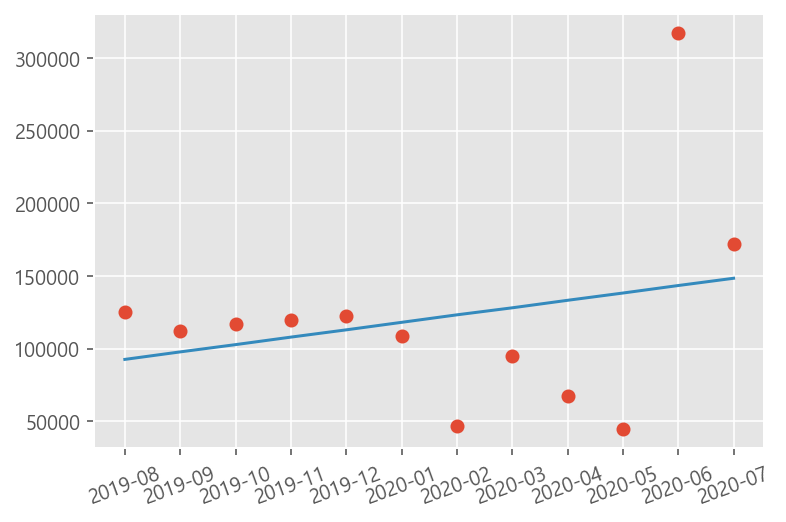

In [41]:
predict_people('중앙동','총 유동인구')

In [36]:
# predict_money_power('금정구')

## 상권 분석 시각화
### 상권의 등급 매기기
* 원하는 상권과 그 상권이 속한 구의 평균 상권의 차이를 구해서 각 항목의 합을 구함
    * 단위가 차이 나기 때문에 개별 컬럼별로 Z-normalization을 해주고 가중치를 조절함
        * 유동인구, 영업이익/매출액(%), 경쟁업체 순으로 영향을 미친다고 생각하여 그에 따른 가중치 추가
        * 소상공인 상권분석 서비스와 비교하여 가장 비슷했던 [1.8, 1.0, 1.4, 1.0, 1.8]을 가중치로 쓰기로 결정 
    * 하위 25% : 나쁨, 하위 25%-평균 : 고려, 평균-상위 25% : 양호, 상위 25% : 좋음이라고 평가

중구
['중앙동', '동광동', '대청동', '보수동', '부평동', '광복동', '남포동', '영주1동', '영주2동']
서구
['동대신1동', '동대신2동', '동대신3동', '서대신1동', '서대신3동', '서대신4동', '부민동', '아미동', '초장동', '충무동', '남부민1동', '남부민2동', '암남동']
동구
['초량1동', '초량2동', '초량3동', '초량6동', '수정1동', '수정2동', '수정4동', '수정5동', '범일1동', '범일2동', '범일5동']
영도구
['남항동', '영선1동', '영선2동', '신선동', '봉래1동', '봉래2동', '청학1동', '청학2동', '동삼1동', '동삼2동', '동삼3동']
부산진구
['부전1동', '부전2동', '연지동', '초읍동', '양정1동', '양정2동', '전포1동', '전포2동', '부암1동', '부암3동', '당감1동', '당감2동', '당감4동', '가야1동', '가야2동', '개금1동', '개금2동', '개금3동', '범천1동', '범천2동']
동래구
['수민동', '복산동', '명륜동', '온천1동', '온천2동', '온천3동', '사직1동', '사직2동', '사직3동', '안락1동', '안락2동', '명장1동', '명장2동']
남구
['대연1동', '대연3동', '대연4동', '대연5동', '대연6동', '용호1동', '용호2동', '용호3동', '용호4동', '용당동', '감만1동', '감만2동', '우암동', '문현1동', '문현2동', '문현3동', '문현4동']
북구
['구포1동', '구포2동', '구포3동', '금곡동', '화명1동', '화명2동', '화명3동', '덕천1동', '덕천2동', '덕천3동', '만덕1동', '만덕2동', '만덕3동']
해운대구
['우1동', '우2동', '중1동', '중2동', '좌1동', '좌2동', '좌3동', '좌4동', '송정동', '반여1동', '반여2동', '반여3동', '반여4동', '반송1동', '반송2동', '재송1동

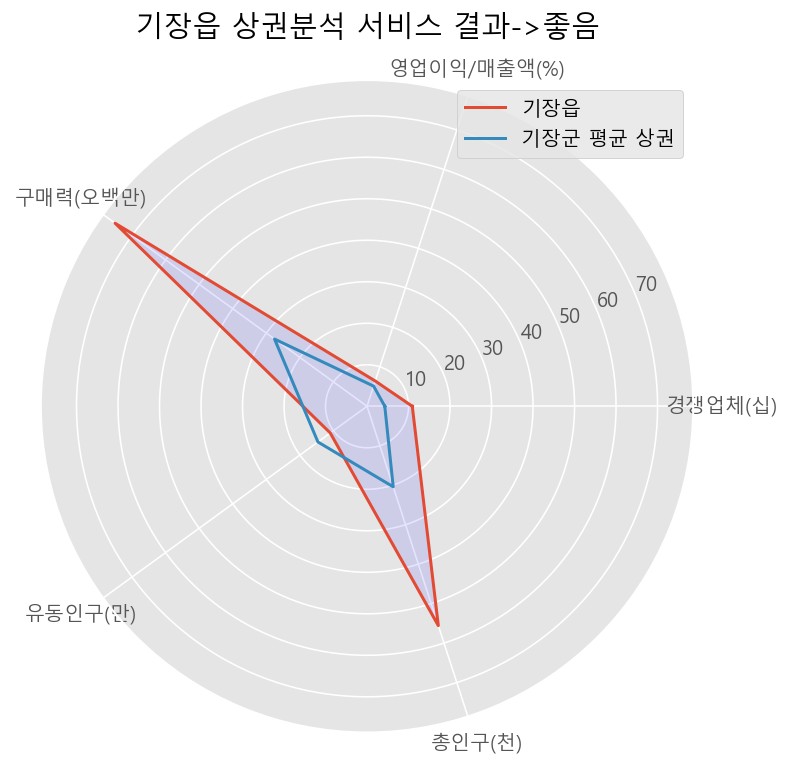

In [37]:
Depts = ["경쟁업체(십)","영업이익/매출액(%)","구매력(오백만)","유동인구(만)", "총인구(천)"]
# 진입 상권

for i in range(len(gu_list)):
    print(gu_list[i])
    print(dong_list_per_gu[i])
    
want_store=input()
want_data=data_per_dong[data_per_dong['읍면동']==want_store]
want_s=[want_data['경쟁업체 수'].tolist()[0]/10, want_data['영업이익/매출액(%)'].tolist()[0], want_data['예측 구매력'].tolist()[0]/5000000, 
        want_data['예측 유동인구'].tolist()[0]/10000, want_data['총 인구'].tolist()[0]/1000, want_data['경쟁업체 수'].tolist()[0]/10]

# 평균 상권
ave_data=data_per_dong[data_per_dong['구군']==want_data['구군'].tolist()[0]]
ave_s=[ave_data['경쟁업체 수'].sum()/len(ave_data['경쟁업체 수'])/10, ave_data['영업이익/매출액(%)'].sum()/len(ave_data['영업이익/매출액(%)']), 
       want_data['구의 동별 평균 구매력'].tolist()[0]/5000000, ave_data['예측 유동인구'].sum()/len(ave_data['예측 유동인구'])/10000, 
       want_data['구의 동별 평균 인구'].tolist()[0]/1000,ave_data['경쟁업체 수'].sum()/len(ave_data['경쟁업체 수'])/10]

nor_want_s=[want_data['경쟁업체 수_정규화'].tolist()[0], want_data['영업이익/매출액(%)_정규화'].tolist()[0],
            want_data['예측 구매력_정규화'].tolist()[0], want_data['예측 유동인구_정규화'].tolist()[0],
            want_data['총 인구_정규화'].tolist()[0], want_data['경쟁업체 수_정규화'].tolist()[0]]

nor_ave_s=[ave_data['경쟁업체 수_정규화'].sum()/len(ave_data['경쟁업체 수_정규화']),
           ave_data['영업이익/매출액(%)_정규화'].sum()/len(ave_data['영업이익/매출액(%)_정규화']), 
       want_data['구의 동별 평균 구매력_정규화'].tolist()[0], ave_data['예측 유동인구_정규화'].sum()/len(ave_data['예측 유동인구_정규화']), 
       want_data['구의 동별 평균 인구_정규화'].tolist()[0],ave_data['경쟁업체 수_정규화'].sum()/len(ave_data['경쟁업체 수_정규화'])]

grade_store_list=[]
for i in range(len(nor_want_s)):
    if i==0:
        grade_store_list.append(-(nor_want_s[i]-nor_ave_s[i])*1.8)
    elif i==2:
        grade_store_list.append((nor_want_s[i]-nor_ave_s[i])*1.4)
    elif i==4:
        grade_store_list.append((nor_want_s[i]-nor_ave_s[i])*1.8)
    else:
        grade_store_list.append((nor_want_s[i]-nor_ave_s[i]))

grade_store=sum(grade_store_list)

grade=''
if grade_store>=sorted(grade_list)[-50]:
    grade='좋음'
elif np.mean(grade_list)<=grade_store<sorted(grade_list)[-50]:
    grade='양호'
elif sorted(grade_list)[50]<=grade_store<np.mean(grade_list):
    grade='고려'
elif grade_store<sorted(grade_list)[50]:
    grade='나쁨'


plt.figure(figsize=(10,6))
plt.subplot(polar=True)

theta = np.linspace(0, 2 * np.pi, len(want_s))

(lines,labels) = plt.thetagrids(range(0,360, int(360/len(Depts))), (Depts))

plt.plot(theta, want_s)
plt.fill(theta, want_s, 'b', alpha=0.1)
plt.plot(theta, ave_s)
plt.legend(labels=(want_store,want_data['구군'].tolist()[0]+' 평균 상권'),loc=1)
plt.title(want_store+" 상권분석 서비스 결과->"+grade)

plt.show();

# 행정동 시각화 작업
## Convex Hell
* 시각화 함수

In [38]:
# point=use_data[use_data['행정동명']=='중앙동'][['경도','위도']]
# point=np.array(point.values.tolist())

# from scipy.spatial import ConvexHull, convex_hull_plot_2d
# hull=ConvexHull(point)

# plt.plot(point[:,0], point[:,1], 'o')
# for simplex in hull.simplices:
#     plt.plot(point[simplex, 0], point[simplex, 1], 'k-')
# plt.show()

* 저장

In [39]:
# data_do=data_do.reset_index().copy()

# for i in range(len(data_do['행정동명'])):
#     if ('제' in data_do['행정동명'][i]):
#         if ('거제' not in data_do['행정동명'][i]):
#             data_do['행정동명'][i]=data_do['행정동명'][i].replace('제','')
#         elif ('거제제' in data_do['행정동명'][i]):
#             data_do['행정동명'][i]=data_do['행정동명'][i].replace('거제제','거제')
            
# last_bor=[]
# for i in dong_list:
#     point=np.array(data_do[data_do['행정동명']==i][['경도','위도']].values.tolist())

#     hull=ConvexHull(point)
#     bor_point=[]

#     for simplex in hull.simplices:
#         bor_point.append([point[simplex, 0][0], point[simplex, 1][0]])
    
#     last_bor.append(bor_point)
    
# all_point=[0]*199
# for i in range(199):
#     all_point[i]=pd.DataFrame(last_bor[i])
#     all_point[i]['읍면동']=dong_list[i]
#     all_point[i].columns=['경도','위도','읍면동']
#     all_point[i]=all_point[i][['읍면동','경도','위도']]
    
# df_all_point=all_point[0]
# for i in range(1, 199):
#     df_all_point=pd.concat([df_all_point, all_point[i]])
    
# df_all_point=df_all_point.reset_index().copy()

# df_all_point.to_csv('./data/save/boundary_angle.csv', encoding='euc-kr')